Enter Team Member Names here (double click to edit):

- Name 1: Hector Curi
- Name 2: Spencer Kaiser
- Name 3:

________

#In Class Assignment Five
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook) to blackboard before the end of class. Be sure to save the notebook before uploading to blackboard.

**Distance Students**: please finish this assignment in 2 hours and 30 minutes. Turn in before next class per the instructions on blackboard.

________________________________________________________________________________________________________

##Running in the 'R' Ecosystem with magics

In [2]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# You will need to have R installed, as well as Rpy2 and the arules library
from rpy2.robjects.packages import importr
from rpy2 import robjects as robj

# this way we can write r code by simply writing %R
%load_ext rmagic
%load_ext rpy2.ipython 
# this enables the %R extension to iPython (does not work outside of the iPython shell)

# these packages will need to be installed
# open R and run 
#     install.package(arules)
#     install.package(arulesViz)

arules = importr('arules') # same as importing in R with the "library" command
arules_viz = importr('arulesViz') # visualize the different rules

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


If you receive a warning on the above block, try to run it again and verify that everything is loaded properly.
___


Parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.8    0.1    1 none FALSE            TRUE    0.05      2     10  rules
   ext
 FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [49 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


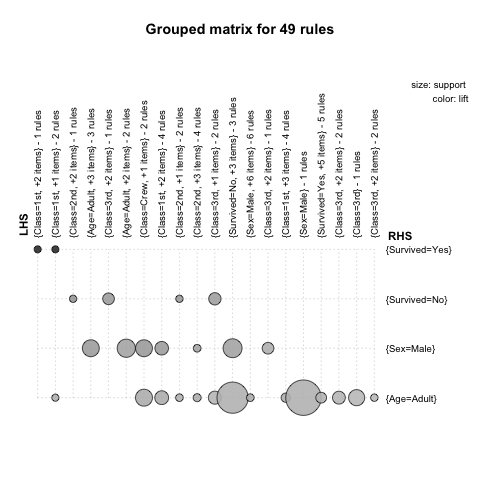

Arules run now from R, test complete


In [3]:
%R load("titanic2.raw.rdata")
%R rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8))
%R rules.sorted <- sort(rules, by="lift")
%R plot(rules.sorted, method="grouped")

print 'Arules run now from R, test complete'

##Understanding the dataset
We have used the titanic dataset before in class, however this dataset has been pruned to only include the class, sex, age (as a nominal), and if the individual survived. The data can be stored in many ways, but is stored here as a table of values. 

**Question**: Is this dataset a typical example of *transaction* data (*i.e.*, like the grocery store transaction data)? Why or Why not? What makes it similar or different? **Hint**: think about the possible itemset lattice and how it might be different. 

___
Enter your answer here:

**No, it is not a typical example of transaction data because it always contains the same number of items in the transaction, as opposed to the grocery list varying in items and # of items in each set.
It can be interpreted as a transaction, but also each item in the itemset has only a limited number of choices.**

**For example, if we substitute the class attribute to drinks (1st representing milk and 3rd representing beer), you could not be able to ever have milk and beer in the same transaction, thus limiting a proper transaction dataset and making the itemset lattice incomplete.**



___

##Frequent Itemsets and Apriori
The in class assignment begins here. Run the following line of code to grab the R loaded data.frame and save it into a pandas dataframe

In [4]:
#IF USING R, RUN THIS CODE
# Use rmagics to save the dataframe into pandas
#(R output)(python var) ( this is all R code)
%R    -o    df_from_R   df_from_R <- titanic.raw

# now we have the exact same dataset as the one from R
# but it is now a pandas dataframe
print df_from_R

     Class    Sex   Age Survived
1      3rd   Male Child       No
2      3rd   Male Child       No
3      3rd   Male Child       No
4      3rd   Male Child       No
5      3rd   Male Child       No
6      3rd   Male Child       No
7      3rd   Male Child       No
8      3rd   Male Child       No
9      3rd   Male Child       No
10     3rd   Male Child       No
11     3rd   Male Child       No
12     3rd   Male Child       No
13     3rd   Male Child       No
14     3rd   Male Child       No
15     3rd   Male Child       No
16     3rd   Male Child       No
17     3rd   Male Child       No
18     3rd   Male Child       No
19     3rd   Male Child       No
20     3rd   Male Child       No
21     3rd   Male Child       No
22     3rd   Male Child       No
23     3rd   Male Child       No
24     3rd   Male Child       No
25     3rd   Male Child       No
26     3rd   Male Child       No
27     3rd   Male Child       No
28     3rd   Male Child       No
29     3rd   Male Child       No
30     3rd

In [5]:
# IF NOT USING R RUN THIS CODE
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_from_R = pd.read_csv('Rframe_as_pandas.csv')
df_from_R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2200
Data columns (total 5 columns):
Unnamed: 0    2201 non-null int64
Class         2201 non-null object
Sex           2201 non-null object
Age           2201 non-null object
Survived      2201 non-null object
dtypes: int64(1), object(4)
memory usage: 103.2+ KB


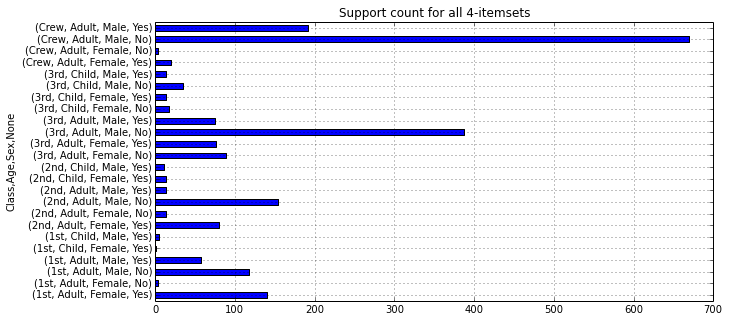

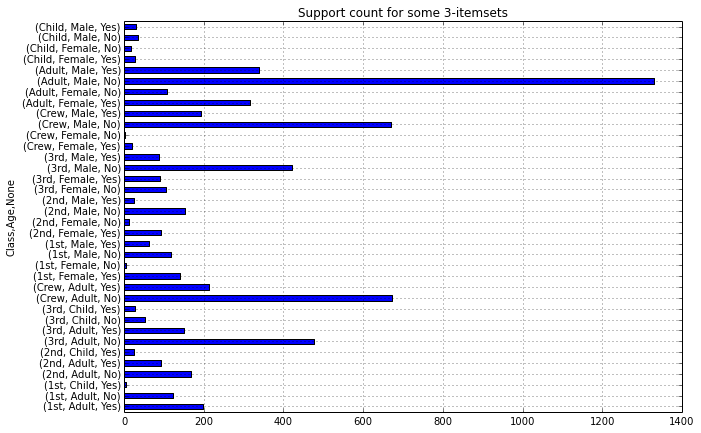

In [6]:
# Now lets plot the number of times each itemset occurs graphically
f = plt.figure(figsize=(10,5))
df_grouped = df_from_R.groupby(by=['Class','Age','Sex'])
ax = df_grouped.Survived.value_counts().plot(kind='barh')
plt.title('Support count for all 4-itemsets')

f = plt.figure(figsize=(10,7))
df_grouped = df_from_R.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts()
df_grouped = df_from_R.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts()

pd.concat((countsA,countsB,countsC)).plot(kind='barh')
plt.title('Support count for some 3-itemsets')



Use the graphs above to estimate the values for the following quantities. You do not need to calculate counts from the dataset, just try to get close by viewing from the graph. Recall that for a given rule, $X\rightarrow Y$, the confidence is given by 
$$c=\frac{\sigma( X \cup Y)}{\sigma( X )} $$

**Questions**: Given the graphs above, what is the support count, $\sigma$, and support, $s$, for the itemset {1st, Adult, Yes}? What about the itemset {1st, Adult, Yes, Female}?

**Question**: What is the confidence, $c$, for the rule {1st, Adult, Yes} $\rightarrow$ {Female}? 

___
Enter your answer here:

The Support Count for {1st, Adult, Yes} is: **197**

The Support for {1st, Adult, Yes} is: **0.089**

The Support Count for {1st, Adult, Yes, Female} is: **140**

The Support for {1st, Adult, Yes, Female} is: **0.063**

The Confidence for  {1st, Adult, Yes} → {Female} is: **0.71**





In [7]:
# Insert any calculations needed to answer the above question here

# %R rules = apriori(titanic.raw)
# %R inspect(rules)

print 197/2201.0
print 140/2201.0

print 140/197.0

df_grouped = df_from_R.groupby(by=['Class','Age', 'Survived'])
total = df_from_R.count()
print total

counts = df_grouped.Sex.value_counts()
print counts


counts = df_grouped.count()
print counts

0.0895047705588
0.0636074511586
0.710659898477
Unnamed: 0    2201
Class         2201
Sex           2201
Age           2201
Survived      2201
dtype: int64
Class  Age    Survived        
1st    Adult  No        Male      118
                        Female      4
              Yes       Female    140
                        Male       57
       Child  Yes       Male        5
                        Female      1
2nd    Adult  No        Male      154
                        Female     13
              Yes       Female     80
                        Male       14
       Child  Yes       Female     13
                        Male       11
3rd    Adult  No        Male      387
                        Female     89
              Yes       Female     76
                        Male       75
       Child  No        Male       35
                        Female     17
              Yes       Female     14
                        Male       13
Crew   Adult  No        Male      670
                

___
___
**Question**: Using the support count graphs, what is the support count for a *minsup* threshold of 0.25? From the graphs, which itemsets would be considered frequent with a *minsup* of 0.25? Are any of the 4-itemsets also maximal for this value of *minsup*? Why or Why not?

___
Enter your answer here:

The min sup is: **550.25**.

In the 4-itemset graph the itemsets are: **{Crew, Adult, Male, No}**

In the 3-itemset graph the itemsets are: **{Adult, Male, No}, {Crew, Male, No}, {Crew, Adult, No}**

Yes, **{Crew, Adult, Male, No}** is the only frequent 4-itemset and has no supersets, thus it is also maximal.


In [8]:
# Insert any calculations needed to answer the above question here
2201*.25

550.25

___

###Generating candidates 
Assume that the 3-itemset graph above contains all the possible 3-itemsets in the titanic dataset and their support count. **Exercise**: If the minimum support count equals 200, then use the bar graph to select the 3-itemsets that are frequent. Use these itemsets and the apriori principle to generate candidate 4-itemsets that might be frequent. 

___
Enter your answer here:

**3-itemsets that are frequent:**

 {Adult, Male, Yes}
 
 {Adult, Male, No}
 
 {Adult, Female, Yes}
 
 {Crew, Male, No}
 
 {3rd, Male, No}
 
 {Crew, Adult, Yes}
 
 {Crew, Adult, No}
 
 {3rd, Adult, No}
 
**4-itemsets that might be frequent, using apriori:**

 {Crew, Adult, Male, No}
 
 {Crew, Adult, Male, Yes}
 
 {Crew, Adult, Female, Yes}
 
 {3rd, Adult, Male, No}
 
  




##Using the Arules Package to Interpret Data
Run the following R code to run the Apriori algorithm on the titanic dataset. **Exercise**: Change the parameters of the apriori algorithm in order to check your results from the previous question. That is, change the minlen, supp, and conf parameters so that it only displays 4-itemsets with minimum "support count" of 200. Do the itemsets from the resulting rules match with what you found in the previous questions? Should they? Why or why not?

In [9]:
# IF USING R RUN THIS CODE
%R load("titanic2.raw.rdata")
%R rules <- apriori(titanic.raw,parameter = list(minlen=4, supp=0.09086779, conf=0.1))
%R rules.sorted <- sort(rules, by="support")
%R inspect(rules.sorted)


Parameter specification:
 confidence minval smax arem  aval originalSupport    support minlen maxlen
        0.1    0.1    1 none FALSE            TRUE 0.09086779      4     10
 target   ext
  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [8 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


  lhs              rhs             support confidence      lift
1 {Class=Crew,                                                 
   Sex=Male,                                                   
   Survived=No} => {Age=Adult}   0.3044071  1.0000000 1.0521033
2 {Class=Crew,                                                 
   Age=Adult,                                                  
   Survived=No} => {Sex=Male}    0.3044071  0.9955423 1.2658514
3 {Class=Crew,                                                 
   Sex=Male,                                                   
   Age=Adult}   => {Survived=No} 0.3044071  0.7772622 1.1481571
4 {Sex=Male,                                                   
   Age=Adult,                                                  
   Survived=No} => {Class=Crew}  0.3044071  0.5041384 1.2537952
5 {Class=3rd,                                                  
   Sex=Male,                                                   
   Survived=No} => {Age=Adult}   0.17582

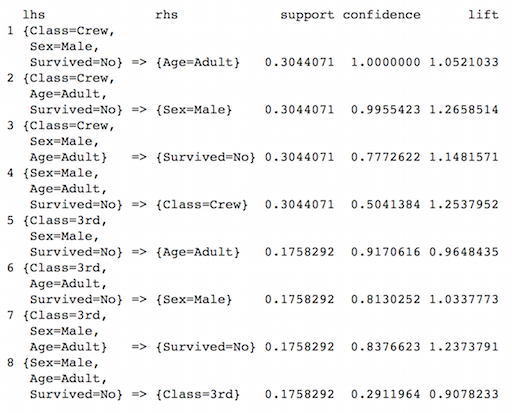

In [10]:
# IF NOT USING R RUN THIS CODE (It is an example snapshot of using arules) AND INTERPRET THE OUTPUTS
from IPython.display import Image
Image('R_arules_output.png')

# Also, change the parameters to the following line of code to what you think they should be:
# rules <- apriori(titanic.raw,parameter = list(minlen=4, supp=0.09086779, conf=0.1))

___
Enter your answer here:

**Yes, it matches all of them except {Crew, Adult, Female, Yes} because the support is below the minimum threshold for this itemset. They should mostly match because of the apriori principle. **


___

##Using the Arules Viz Package 
Now run the following code to visualize the rules from the previous step. There are various parameters built into the visualization such as support, confidence, and a parameter known as "lift." Lift is a measure that ranks different rules using the equation 
$$ Lift = \frac{P(Y|X)}{P(Y)} = \frac{c(X\rightarrow Y)}{s(Y)} $$
In practice, there are many different measures that we use to rank the rules from a dataset, but, at the end of the day, a human evaluates which rules are most subjectively interesting. The arulesViz library allows many different types of interpretations for looking at lift and confidence together. The documentation is here:
http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf 

The styles of plot are "scatterplot", "two-key plot", "matrix", "matrix3D", "graph", "paracoord" or "grouped." Each provides a different view of the rules. Try at least three plots using the boilerplate code below (you just need to change the "method" parameter of the plot). After looking at the visualizations possible answer th following:

**Question**: Which rules are the most interesting according to Lift, according to confidence, and, lastly, according to you? Why?

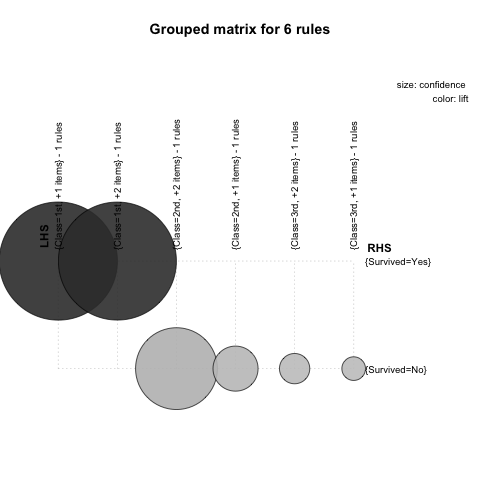

The Graphic for rules grouped by lift and their support


In [11]:
# IF USING R, RUN THIS CODE
# do not change the arules code
%R rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8), appearance = list(rhs=c("Survived=No", "Survived=Yes"), default="lhs"), control = list(verbose=F))
%R rules.sorted <- sort(rules, by="lift")

# change or add plots using the following lines:
%R plot(rules.sorted, method="grouped", measure = 'confidence', shading='lift')

print 'The Graphic for rules grouped by lift and their support'

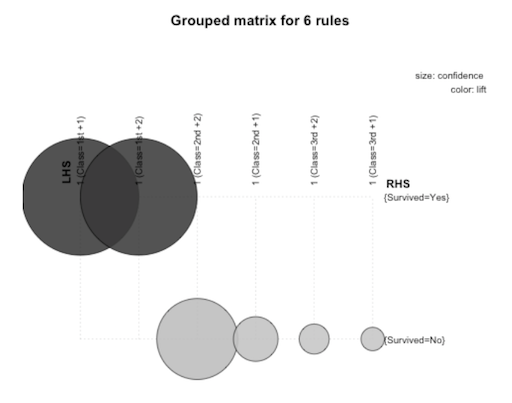

In [12]:
#IF NOT USING R RUN THIS CODE TO SEE EXAMPLE IMAGES
from IPython.display import Image
Image('Arules_grouped.png')

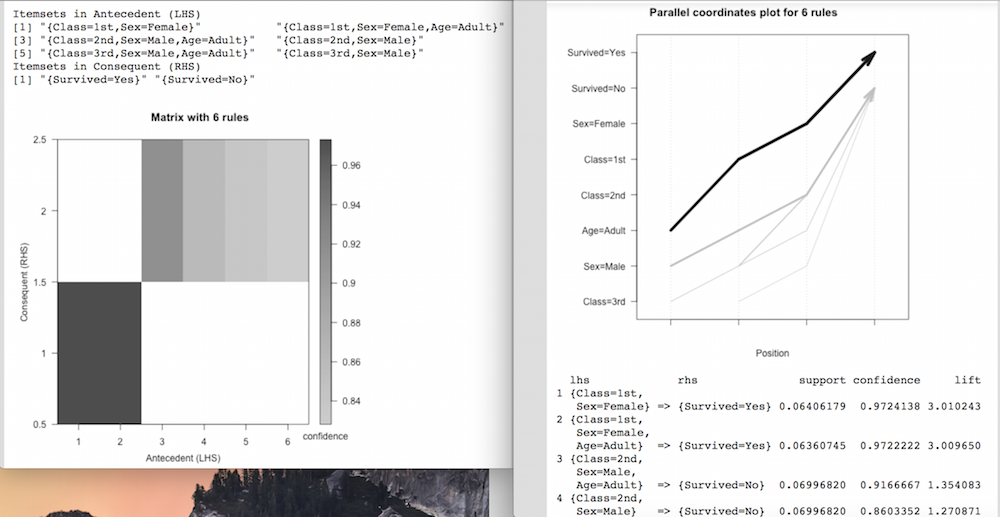

In [13]:
Image('Arules_graph2_3.png')

___
Enter your answer here:

The most interesting according to lyft is that being 1st class plus 1 other item (probably female) saved your life.

The most interesting according to confidence is also the same.

The most interesting according to us is that being in second or third class meant death.


___


**Question**: Who is the lead author (and maintainer) for the arules package and the arulesViz package? What University does he/she currently teach at?

http://cran.r-project.org/web/packages/arules/arules.pdf

http://cran.r-project.org/web/packages/arulesViz/arulesViz.pdf

___
Enter your answer here:

**Michael Hahsler
 at SMU**

___

________________________________________________________________________________________________________

That's all! Please **upload your rendered notebook to blackboard** and please include **team member names** in the notebook submission.